<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Hypothesis Test and Power


---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import scipy.stats as stats

## Testing the t-test

We can illustrate the capabilities of the t-test with an artificial example by drawing samples from a normal distribution. We create groups with different means and therefore know that they are different. The t-test should reject the null hypothesis. Will the t-test really come up with the correct result?

In [3]:
def generate_group(mean, std, n):
    return np.random.normal(mean, std, size=n)

In [4]:
# create two groups with different means but same std and n
#np.random.seed(10)
g1 = generate_group(100, 100, 5000)
g2 = generate_group(101, 100, 5000)

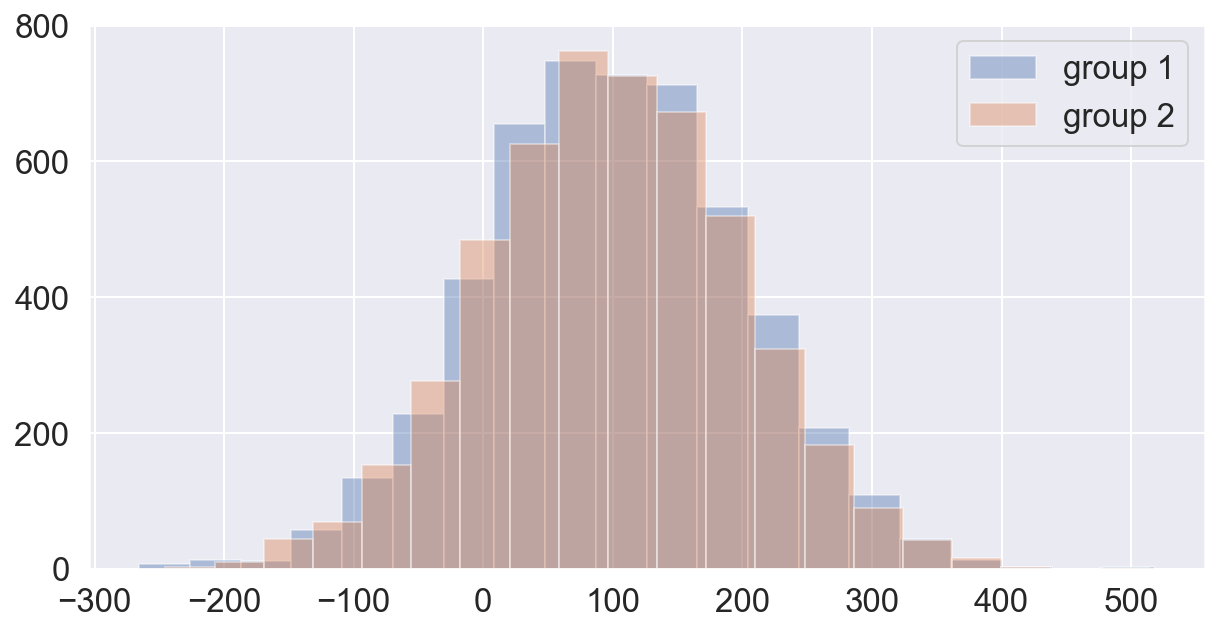

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(g1, bins=20, ax=ax, kde=False, label='group 1')
sns.distplot(g2, bins=20, ax=ax, kde=False, label='group 2')
ax.legend()
plt.show()

In [6]:
# calculate the p-value
print(stats.ttest_ind(g1, g2))

Ttest_indResult(statistic=-0.15975235379197736, pvalue=0.87307938518471)


Repeat the above with different means closer to each other or further apart, with different standard deviations and different numbers of samples. 

## Now use a while loop to draw the data samples repeatedly


- Repeat the process at least 1000 times.
- Calculate the p-value resulting from the t-test in each iteration and append it to a list.
- Determine the fraction of p-values which are smaller than 0.05.
- Plot a histogram of the resulting p-values.
- Repeat with different means, standard deviations and sample sizes.

> **Note:** The fraction of experiments in which the statistical test correctly rejects the null hypothesis is called the **power** of the test.

In [7]:
i = 0
pvals = []

while i < 1000:
    g1 = generate_group(100, 5, 50)
    g2 = generate_group(102, 5, 50)
    pvals.append(stats.ttest_ind(g1, g2).pvalue)
    i += 1
pvals = np.array(pvals)

In [8]:
(pvals<0.05).mean()

0.524

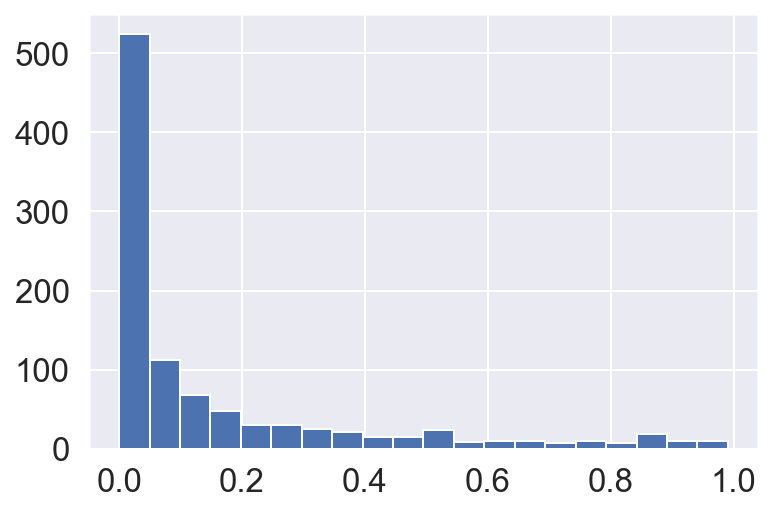

In [9]:
plt.hist(pvals, bins=20)
plt.show()